# **Space X  Falcon 9 First Stage Landing Prediction**


# Machine Learning model development


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. 


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Loading the dataframe


In [38]:
import requests
import io

# URL of the dataset
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the data using requests
response1 = requests.get(URL1)

# Check if the request was successful

    # Convert the response content to a BytesIO object and read it into a DataFrame
text1 = io.BytesIO(response1.content)
data = pd.read_csv(text1)



In [39]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [40]:
data.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
text2 = io.BytesIO(resp2.content)
X = pd.read_csv(text2)

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [44]:
data.isnull().sum()/len(data)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
Class              0.000000
dtype: float64

## Getting ready the data for training


Creating a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>

In [7]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


Using the function train_test_split to split the data X and Y into training and test data. Setting the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)

In [10]:
Y_test.shape

(18,)

we can see we only have 18 test samples.


## Model Initialization


Creating a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fitting the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [12]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [13]:
# for hinding unnecessory warning and preprossings
import warnings

warnings.filterwarnings('ignore')

In [14]:
logReg = LogisticRegression()
logreg_cv = GridSearchCV(logReg, parameters)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8342857142857143


Calculating the accuracy on the test data using the method <code>score</code>:


In [16]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

Lets look at the confusion matrix:


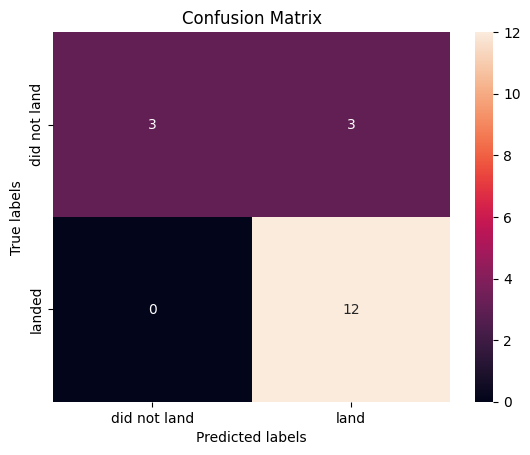

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## SVM model


In [18]:
# defining parameters for support vector machine algo
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}


In [19]:
svm = SVC() # object for support vector machine
svm_cv = GridSearchCV(svm, parameters, cv=10) # iniciating grid search cv
svm_cv.fit(X_train, Y_train) # fitting the data on svm model 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [20]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Calculating the accuracy on the test data using the method <code>score</code>:


In [21]:
svm_cv.score(X_test, Y_test) 

0.8333333333333334

We can plot the confusion matrix


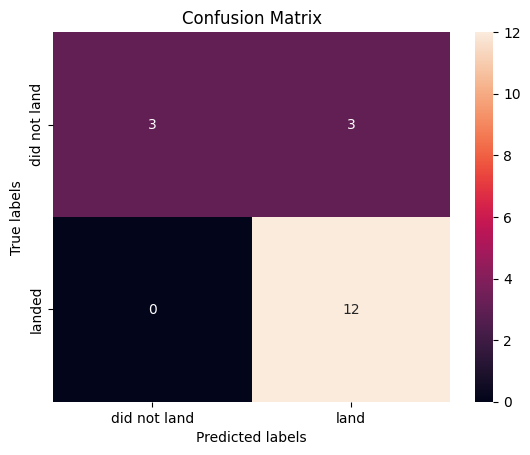

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Decision Tree Classifier Model


In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [24]:
tree_cv = GridSearchCV(tree, parameters, cv=10) 
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [25]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8732142857142857


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [26]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


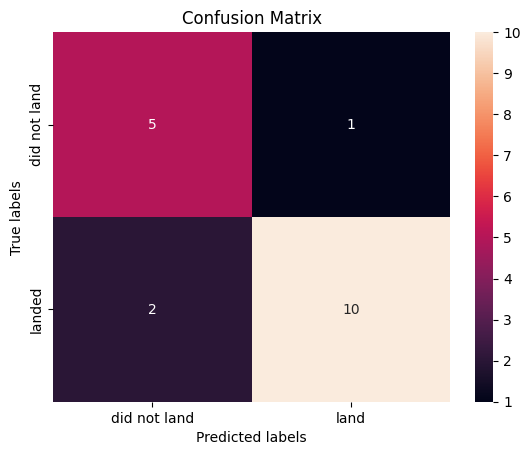

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## KNN Model


In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [29]:
knn_cv = GridSearchCV(KNN, parameters, cv=10) 
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calculating the accuracy of knn_cv on the test data using the method <code>score</code>:


In [31]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


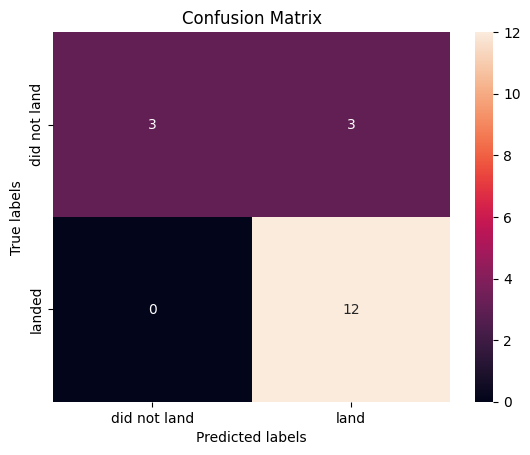

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### Finding the method performs best:


In [33]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


In [34]:
# Step 1: Initialize the models
logreg = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'lbfgs',max_iter=1000)
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth= 6, max_features = 'sqrt',
                                       min_samples_leaf = 1, min_samples_split= 5, splitter= 'random')

# Step 2: Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# Step 3: Perform 10-fold cross-validation for Logistic Regression
logreg_cv_results = cross_validate(logreg, X, Y, cv=10, scoring=scoring)

# Step 4: Perform 10-fold cross-validation for Decision Tree
decision_tree_cv_results = cross_validate(decision_tree, X, Y, cv=10, scoring=scoring)

# Step 5: Print results for Logistic Regression
print("Logistic Regression Performance (Cross-Validation):")
print(f"Accuracy: {logreg_cv_results['test_accuracy'].mean() * 100:.2f}%")
print(f"Precision: {logreg_cv_results['test_precision'].mean() * 100:.2f}%")
print(f"Recall: {logreg_cv_results['test_recall'].mean() * 100:.2f}%")
print(f"F1-Score: {logreg_cv_results['test_f1'].mean() * 100:.2f}%")
print(f"ROC AUC: {logreg_cv_results['test_roc_auc'].mean() * 100:.2f}%\n")

# Step 6: Print results for Decision Tree
print("Decision Tree Performance (Cross-Validation):")
print(f"Accuracy: {decision_tree_cv_results['test_accuracy'].mean() * 100:.2f}%")
print(f"Precision: {decision_tree_cv_results['test_precision'].mean() * 100:.2f}%")
print(f"Recall: {decision_tree_cv_results['test_recall'].mean() * 100:.2f}%")
print(f"F1-Score: {decision_tree_cv_results['test_f1'].mean() * 100:.2f}%")
print(f"ROC AUC: {decision_tree_cv_results['test_roc_auc'].mean() * 100:.2f}%")



Logistic Regression Performance (Cross-Validation):
Accuracy: 82.22%
Precision: 83.69%
Recall: 95.00%
F1-Score: 87.96%
ROC AUC: 83.89%

Decision Tree Performance (Cross-Validation):
Accuracy: 76.67%
Precision: 74.29%
Recall: 85.00%
F1-Score: 78.72%
ROC AUC: 72.22%


## Results on Test Data

In [35]:
print('DecisionTreeClassifier :', tree_cv.score(X_test, Y_test))

print('LogisticRegression :', logreg_cv.score(X_test, Y_test))

DecisionTreeClassifier : 0.8333333333333334
LogisticRegression : 0.8333333333333334


## Visualizing The Results

- Key Metrics 
    - Accuracy: Measures overall correctness.
    - Precision: Measures how many of the predicted positives are actual positives.
    - Recall: Measures how many of the actual positives are predicted correctly.
    - F1-Score: The harmonic mean of precision and recall.
    - ROC AUC: Measures the model's ability to distinguish between classes (useful for binary classification).


<Figure size 1000x600 with 0 Axes>

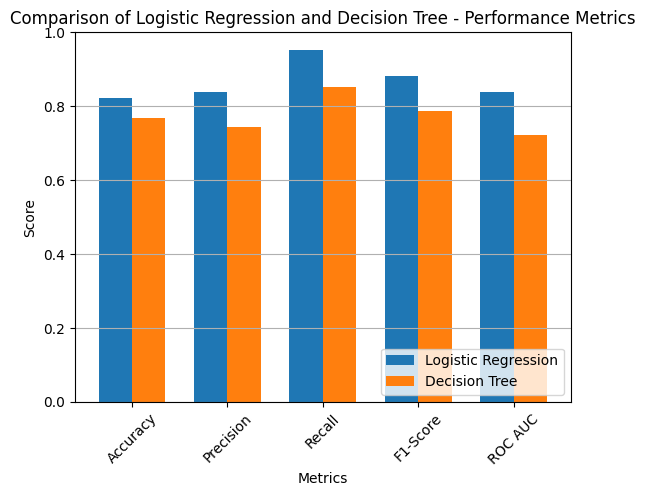

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Store the mean values for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

logreg_scores = [
    logreg_cv_results['test_accuracy'].mean(),
    logreg_cv_results['test_precision'].mean(),
    logreg_cv_results['test_recall'].mean(),
    logreg_cv_results['test_f1'].mean(),
    logreg_cv_results['test_roc_auc'].mean()
]

decision_tree_scores = [
    decision_tree_cv_results['test_accuracy'].mean(),
    decision_tree_cv_results['test_precision'].mean(),
    decision_tree_cv_results['test_recall'].mean(),
    decision_tree_cv_results['test_f1'].mean(),
    decision_tree_cv_results['test_roc_auc'].mean()
]

# Step 2: Create a DataFrame for visualization
scores_df = pd.DataFrame({
    'Metrics': metrics,
    'Logistic Regression': logreg_scores,
    'Decision Tree': decision_tree_scores
})

# Step 3: Visualization - Bar Plot
plt.figure(figsize=(10, 6))
scores_df.set_index('Metrics').plot(kind='bar', width=0.7)
plt.title('Comparison of Logistic Regression and Decision Tree - Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Since scores are between 0 and 1
plt.grid(axis='y')

# Step 4: Display the plot
plt.legend(loc="lower right")
plt.show()


### Box Plot for Cross-Validation Scores
Visualize the distribution of scores across the 10 folds.
It shows the distribution of each metric across the 10 cross-validation folds, allowing you to see how consistent each model's performance is.

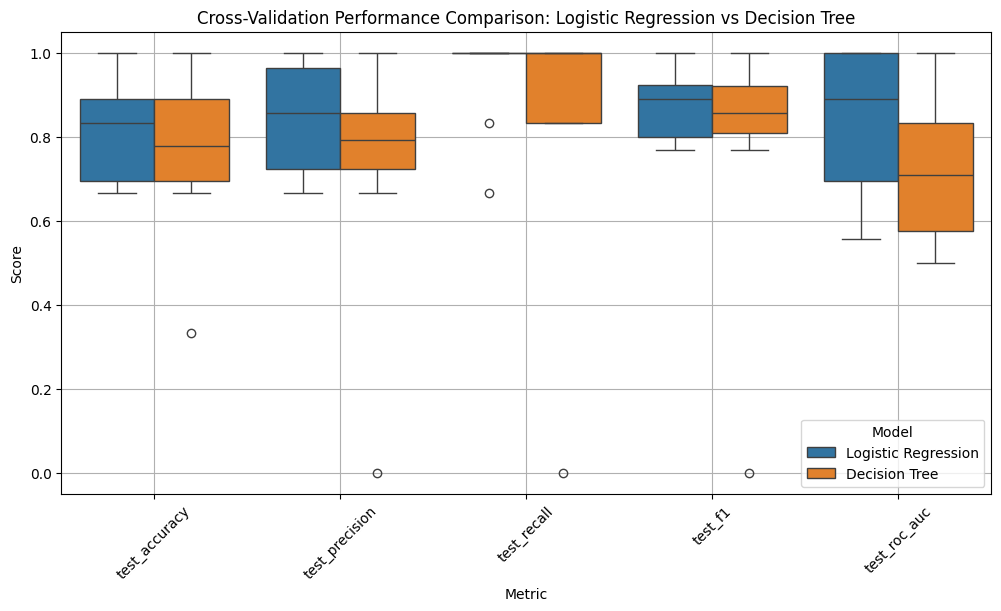

In [37]:
# Step 1: Combine the cross-validation results into a DataFrame
logreg_cv_data = pd.DataFrame(logreg_cv_results)
logreg_cv_data['Model'] = 'Logistic Regression'

decision_tree_cv_data = pd.DataFrame(decision_tree_cv_results)
decision_tree_cv_data['Model'] = 'Decision Tree'

# Combine both models' results
cv_data = pd.concat([logreg_cv_data, decision_tree_cv_data])

# Step 2: Reshape the DataFrame for easier plotting
cv_data_melted = cv_data.melt(id_vars='Model', value_vars=['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc'],
                              var_name='Metric', value_name='Score')

# Step 3: Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Score', hue='Model', data=cv_data_melted)
plt.title('Cross-Validation Performance Comparison: Logistic Regression vs Decision Tree')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.grid(True)
plt.show()


### Conclusion: 
#### Logistic Regression is the Best Performing Model with the score of 0.83.
After comparing the performance of multiple models, including Logistic Regression , it is evident that the Logistic Regression outperforms Decision Tree in key metrics. The Logistic Regression model demonstrated higher accuracy, precision, recall, and F1-score across various cross-validation folds, making it the most suitable choice for this task.

Given these factors, the Decision Tree is concluded to be the best-performing model for our dataset, providing a balance of accuracy, interpretability, and robustness in predicting outcomes.

## Authors


[Suraj Singh](https://www.linkedin.com/in/suraj-singh-naurang/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>
